# 다항 선형 회귀(Polynomial Linear Regression) : y = m1x^1 + m2x^2 + m3x^3 ... + b
원래 있던 피쳐를 확장하는 개념 -> 데이터를 더 잘 표현하기 위함(ex) 1차 직선 -> 2차 곡선)
구글 검색 : polynomial regression data fit => 해당 사이트에서 비쥬얼 적으로 그래프 조작하면서 확인 가능

과소적합 : 데이터를 잘 표현하지 못하는 상황 => 개선 여지
과대적합 : 훈련 데이터는 매우 잘 표현하지만, 모델이 너무 훈련 데이터에만 적합하여 테스트 데이터 및 실제 데이터는 잘 표현하지 못합

### 공부 시간에 따른 시험 점수

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('./PolynomialRegressionData.csv')

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### 3-1. Simple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y) # 전체 데이터 학습

LinearRegression()

#### 데이터 시각화

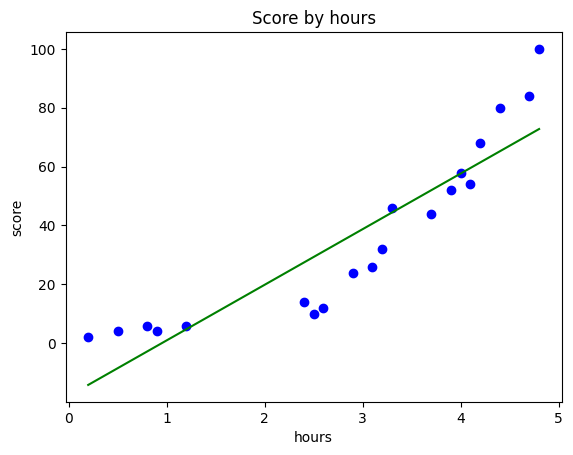

In [ ]:
plt.scatter(X, y, c = 'b')
plt.plot(X, reg.predict(X), c = 'g')
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [ ]:
reg.score(X, y)

0.8169296513411765

### 3-2 Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures # 몇차 다항식으로 할지 설정 가능 => 너무 크게 한다면 과대적합 가능성(훈련데이터만 잘 맞추는 모델이 됨)
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X) # x -> x^0 x^1 x^2

In [ ]:
X[:5], X_poly[:5]

(array([[0.2],
        [0.5],
        [0.8],
        [0.9],
        [1.2]]),
 array([[1.0000e+00, 2.0000e-01, 4.0000e-02, 8.0000e-03, 1.6000e-03],
        [1.0000e+00, 5.0000e-01, 2.5000e-01, 1.2500e-01, 6.2500e-02],
        [1.0000e+00, 8.0000e-01, 6.4000e-01, 5.1200e-01, 4.0960e-01],
        [1.0000e+00, 9.0000e-01, 8.1000e-01, 7.2900e-01, 6.5610e-01],
        [1.0000e+00, 1.2000e+00, 1.4400e+00, 1.7280e+00, 2.0736e+00]]))

In [ ]:
poly_reg.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4'], dtype=object)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

#### 데이터 시각화

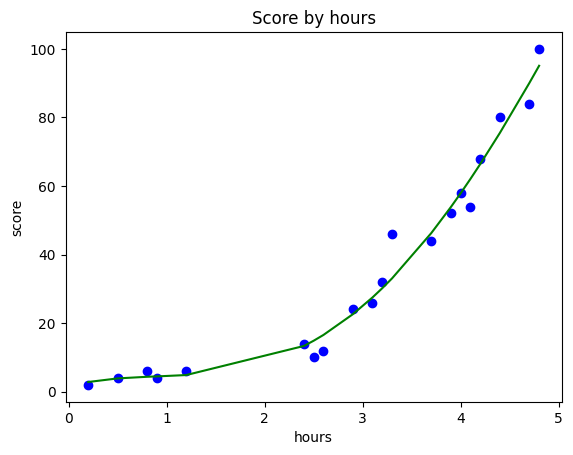

In [ ]:
plt.scatter(X, y, c = 'b')
plt.plot(X, lin_reg.predict(poly_reg.transform(X)), c = 'g')

plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')

plt.show()

##### 그래프 부드럽게 만들기

In [ ]:
X_range = np.arange(min(X), max(X), 0.1)
X_range

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7])

In [ ]:
X_range.shape, X.shape

((46,), (20, 1))

In [ ]:
X_range = X_range.reshape(-1, 1)
X_range.shape, X.shape

((46, 1), (20, 1))

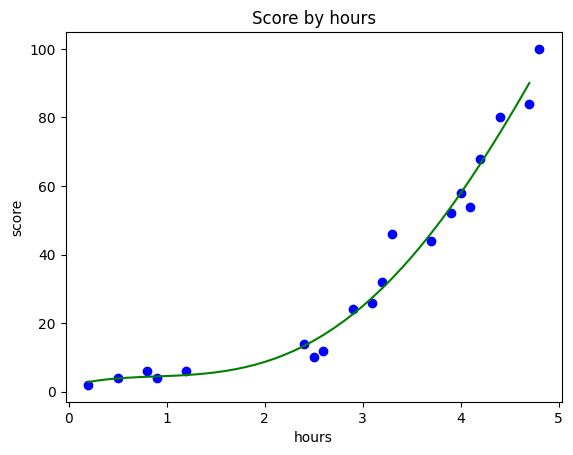

In [ ]:
plt.scatter(X, y, c = 'b')
plt.plot(X_range, lin_reg.predict(poly_reg.transform(X_range)), c = 'g')

plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')

plt.show()

#### 공부 시간에 따른 성적 예측

In [ ]:
reg.predict([[2]]) # 2시간 공부했을 때 선형 회귀 예측

array([19.85348988])

In [ ]:
lin_reg.predict(poly_reg.transform([[2]])) # 2시간 공부했을 때 다항 회귀 예측

array([8.70559135])

In [ ]:
lin_reg.score(poly_reg.transform(X), y)

0.9782775579000046